## Introduction:

This Jupyter Notebook aims to analyze and compare different neighborhoods in Pittsburgh based on three main datasets: arrest_data.csv, park_data.csv, and income_data.csv. The analysis considers three major factors that contribute to a safe and nurturing environment for raising a family: safety, green spaces, and wealth. By evaluating and ranking the neighborhoods according to these factors, we can identify the best neighborhoods in Pittsburgh for raising a family.

### Team Name: First Gen Born
## Team Member(s): 
Evan Zhou evz9@pitt.edu
Avneet Singh abs132@pitt.edu
Nicholas Tillmann nit36@pitt.edu

## The Metrics: 
The analysis in the Jupyter Notebook relies on a combination of metrics related to safety, green spaces, and wealth to evaluate the neighborhoods. These metrics respectively are:

- Arrest Data 
- Park Data
- Income Data 

Which can be found here: https://drive.google.com/drive/folders/1f9nlzJCWOY38pHw5_0aUdjI0AHg9Jn0t?usp=sharing

We could have considered playground data, but if the family has one of the common pets—a dog, then it would probably want more open areas to run around. Furthermore, parks often have more amenities which are allow for communal spaces. These communal spaces are important for feeling belonging in a neighborhood and meeting people, which allows both parents and children to have fun.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

# Read Datasets
arrest_data = pd.read_csv("arrest_data.csv")
parks_data = pd.read_csv("parks_data.csv")
income_data = pd.read_csv("income_data.csv")

## Arrest Data Analysis:

The arrest_data.csv file contains information about arrests made in various neighborhoods across Pittsburgh. This dataset allows us to assess the safety of a neighborhood by calculating the number of arrests made, types of crimes committed, and crime rates. A lower crime rate and fewer arrests indicate a safer environment for children to grow up in. We evaluate a safe neighborhood by tallying up the total number arrests in the neighborhood.

In [84]:
# Process Arrest Data
arrest_count = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_count.columns = ['Neighborhood', 'Arrests']

## Park Data Analysis (aka green spaces)
The parks_data.csv file contains information about the number of parks present in each neighborhood. Access to green spaces and parks is crucial for children's physical and mental well-being, as they provide a space for outdoor activities, social interaction, and relaxation. We evaluate the green spaces by tallying up the total number of parks in the neighborhood.

In [85]:
# Process Parks Data
parks_count = parks_data['neighborhood'].value_counts().reset_index()
parks_count.columns = ['Neighborhood', 'Parks']

# Income Data Analysis:
The income_data.csv file includes demographic data and income levels of residents in each Pittsburgh neighborhood. Analyzing this data helps determine the economic status of the neighborhood and the potential opportunities available to families in terms of employment and income.

We will first preprocess and clean the dataset. After that, we will compute the median household income for each neighborhood and use this as the evaluation for wealth.

In [86]:
# Process Income Data
income_data = income_data[['Community', 'median_household']]
income_data = income_data.rename(columns={'Community': 'Neighborhood', 'median_household': 'Median Income'})
income_data = income_data.replace(',','', regex=True)
income_data['Median Income'] = income_data['Median Income'].astype(float)

# Best Neighborhood
We then combine the metrics together, and rank them accordingly:

(Note: The smaller the number, the higher the rank. For example, 1 is highest rank possible, and 100 is a low rank)
- Fewer arrests -> High rank
- More parks -> High rank
- More median income -> High rank

In [87]:
# Merge All Data
combined_data = arrest_count.merge(parks_count, on='Neighborhood', how='outer').merge(income_data, on='Neighborhood', how='outer')
combined_data = combined_data.dropna()

# Rank Each Metric
combined_data['ArrestsRank'] = combined_data['Arrests'].rank(ascending=True)
combined_data['ParksRank'] = combined_data['Parks'].rank(ascending=False)
combined_data['IncomeRank'] = combined_data['Median Income'].rank(ascending=False)

# Calculate Combined Score
combined_data['CombinedScore'] = combined_data['ArrestsRank'] + combined_data['ParksRank'] + combined_data['IncomeRank']

# Find the Best Neighborhood
best_neighborhood = combined_data.loc[combined_data['CombinedScore'].idxmin(), 'Neighborhood']
print(f"The best neighborhood in Pittsburgh is {best_neighborhood}.")

combined_data = combined_data.sort_values('CombinedScore', ascending=False)
combined_data.tail(10)

The best neighborhood in Pittsburgh is Swisshelm Park.


,Neighborhood,Arrests,Parks,Median Income,ArrestsRank,ParksRank,IncomeRank,CombinedScore
59,Banksville,273.0,2.0,20029.0,23.5,38.5,8.0,70.0
92,Regent Square,35.0,1.0,18520.0,1.0,58.0,11.0,70.0
70,Duquesne Heights,181.0,2.0,17011.0,12.0,38.5,18.0,68.5
91,New Homestead,39.0,1.0,20799.0,2.0,58.0,5.0,65.0
67,Lincoln Place,207.0,2.0,19889.0,15.0,38.5,9.0,62.5
72,Upper Lawrenceville,177.0,3.0,14842.0,10.0,22.0,28.0,60.0
62,Point Breeze North,261.0,3.0,18817.0,20.0,22.0,10.0,52.0
66,Westwood,209.0,3.0,18416.0,16.0,22.0,12.0,50.0
53,Point Breeze,289.0,7.0,22306.0,27.0,4.5,3.0,34.5
89,Swisshelm Park,40.0,3.0,21250.0,3.0,22.0,4.0,29.0


## Results
As seen above, the best neighborhood is Swisshelm Park. Not only does it have very few arrests, but it also has fairly decent median income. Furthermore, this is bolstered by its 3 parks, so it is likely a good place to raise a family.

## Visualization
Below is a visualization of all the neighborhoods analyzed:

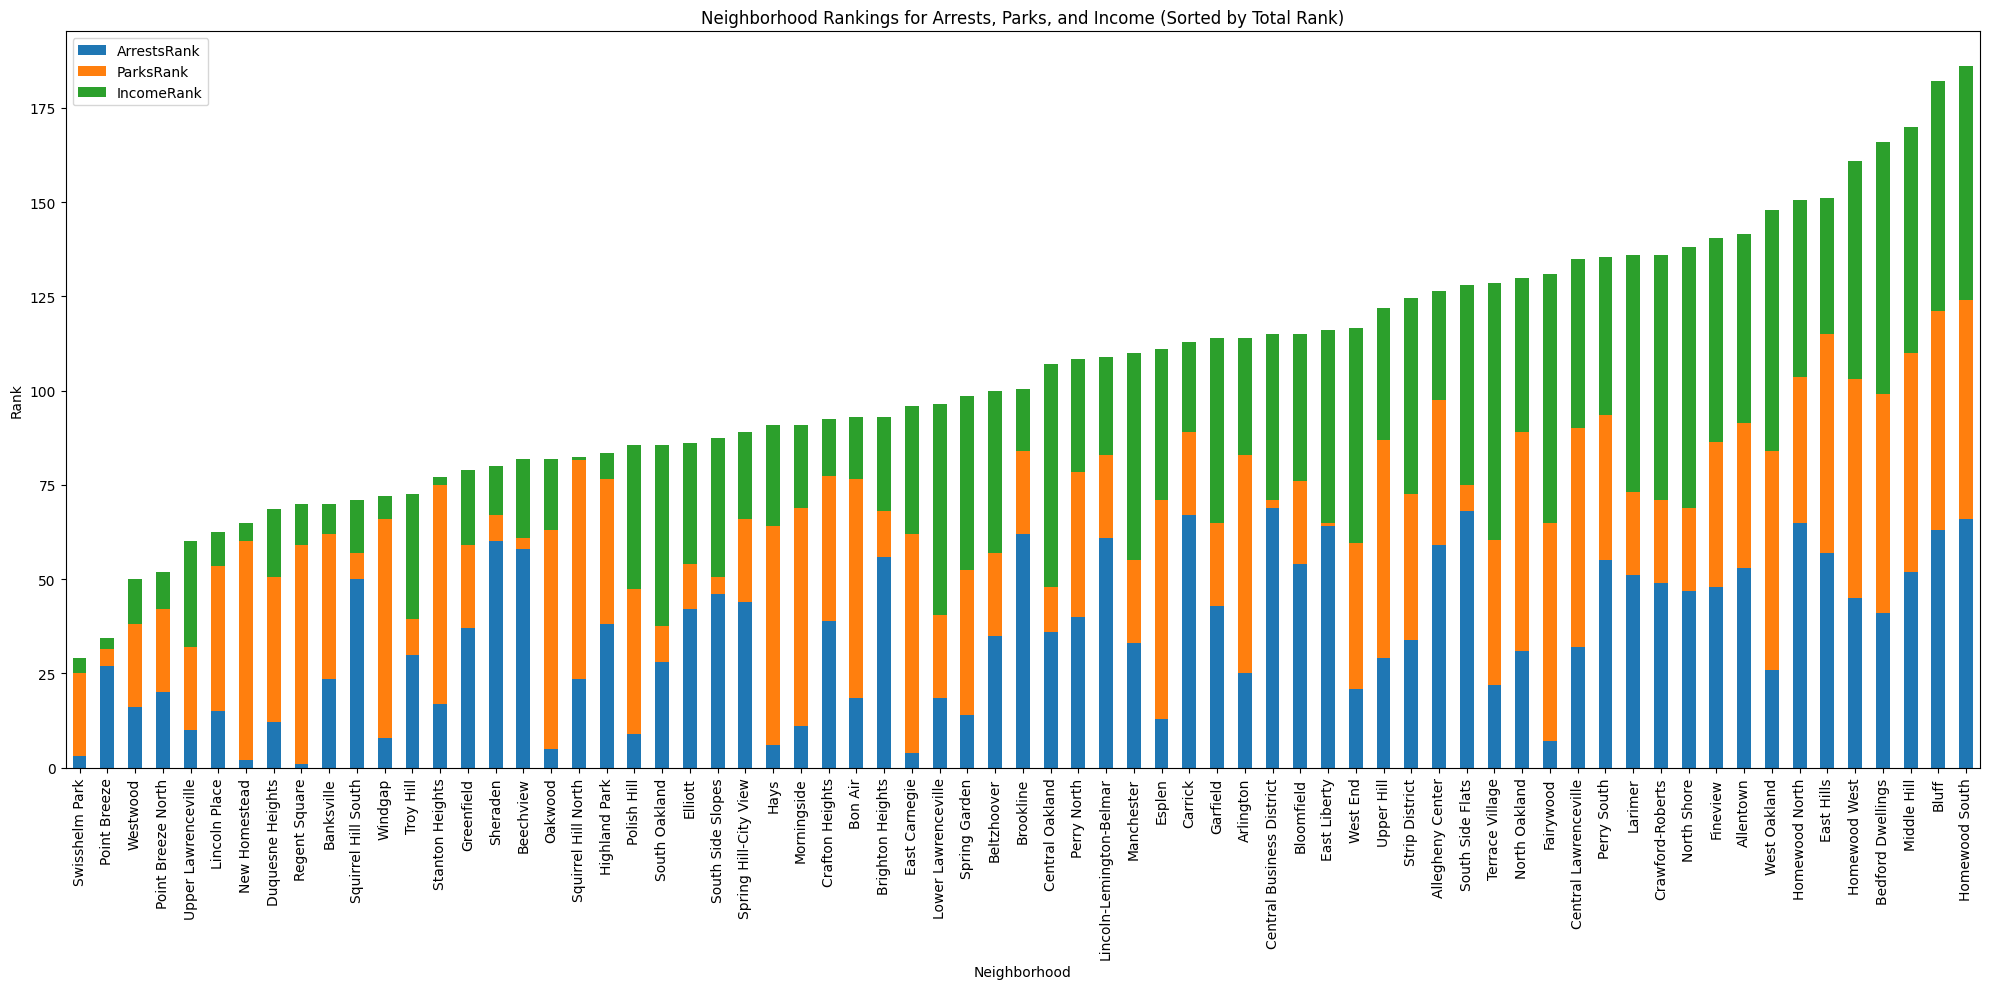

In [88]:
import matplotlib.pyplot as plt

# Calculate total rank and sort the data by it
plot_data = combined_data[['Neighborhood', 'ArrestsRank', 'ParksRank', 'IncomeRank']].set_index('Neighborhood')
plot_data['TotalRank'] = plot_data['ArrestsRank'] + plot_data['ParksRank'] + plot_data['IncomeRank']
plot_data = plot_data.sort_values('TotalRank', ascending=True)

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(20, 10))
plot_data[['ArrestsRank', 'ParksRank', 'IncomeRank']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title("Neighborhood Rankings for Arrests, Parks, and Income (Sorted by Total Rank)")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Rank")

# Display the plot
plt.tight_layout()
plt.show()

## Conclusion:
Nick thought that Regent Square would be the best neighborhood to live in since it has very little crime. What Regent Square lacks however is parks, it has only 1 park! It's fairly decent income contributes to the combined score as well, so Nick's choice does fairly well (rank 11), ranking 9th overall with the other metrics.

Evan thought that Squirrel Hill North (SNH) would be an ideal neighborhood to live in, since it is the wealthiest neighborhood (that has completed data with respect to arrests and parks). We found found that while SNH does have the most income out of the valid neighborhood available, it is lacking in parks, as seen by its park rank (58), which contributes to its not ideal combined score (82.5).

Avneet thought that East Liberty would be the best neighborhood to live in since it has the most parks. However, it also has many arrests, which indicate a high level of crime compared to other neighborhoods (rank 64). Furthermore, it does not have as high of an income as other neighborhoods (rank 51), suggesting that perhaps the parks aren't as well maintained. Or the overall neighborhood isn't as clean, well funded, and safe.

We are all fairly satisfied with Swisshelm Park being the best neighborhood, but Avneet would prefer if there were more parks (Swisshelm is ranked 22 for parks). There is fairly low crime (ranked 3rd) and fairly high income (ranked 4th), so it makes sense that it would be the best neighborhood based on our metrics. 



In [89]:
nick_choice = combined_data[combined_data['Neighborhood'] == "Regent Square"]
evan_choice = combined_data[combined_data['Neighborhood'] == 'Squirrel Hill North']
avneet_choice = combined_data[combined_data['Neighborhood'] == 'East Liberty']
best_choice = combined_data[combined_data['Neighborhood'] == 'Swisshelm Park']
frames = [nick_choice, evan_choice, avneet_choice, best_choice]
our_choices = pd.concat(frames)
our_choices

,Neighborhood,Arrests,Parks,Median Income,ArrestsRank,ParksRank,IncomeRank,CombinedScore
92,Regent Square,35.0,1.0,18520.0,1.0,58.0,11.0,70.0
58,Squirrel Hill North,273.0,1.0,24041.0,23.5,58.0,1.0,82.5
6,East Liberty,1738.0,12.0,10324.0,64.0,1.0,51.0,116.0
89,Swisshelm Park,40.0,3.0,21250.0,3.0,22.0,4.0,29.0
